In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

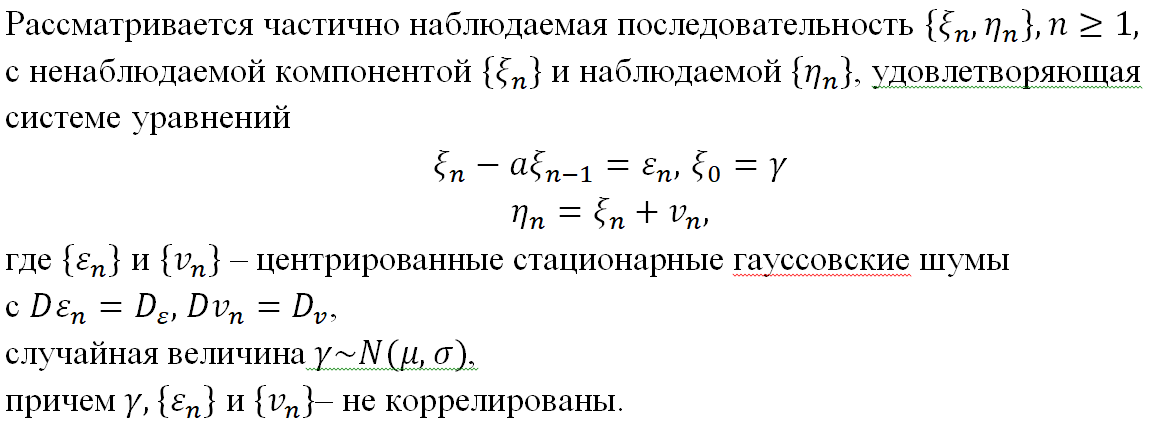

In [ ]:
a = 0.7
mu = 1.5
sigma = 2
D_eps = 0.6
D_v = 0.9
n = 100

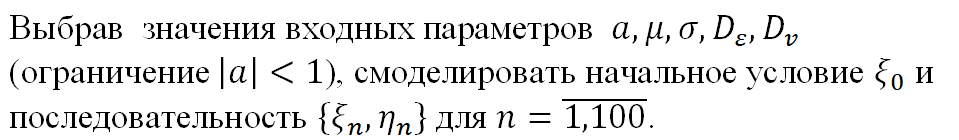

In [ ]:
ksi_0 = np.random.normal(mu, sigma)
eps_n = np.random.normal(0, D_eps, n)
v_n = np.random.normal(0, D_v, n)
ksi_0

1.6173609684920511

In [ ]:
eps_n_visual = pd.DataFrame(eps_n)
eps_n_visual

,0
0,0.699013
1,-0.081393
2,-1.014673
3,-1.327765
4,-0.726629
...,...
95,1.099960
96,0.300931
97,-0.137039
98,-0.054736


In [ ]:
v_n_visual = pd.DataFrame(eps_n)
v_n_visual

,0
0,0.883429
1,0.320491
2,-1.063788
3,0.682328
4,-0.967037
...,...
95,0.446271
96,0.618785
97,-0.745663
98,-0.543545


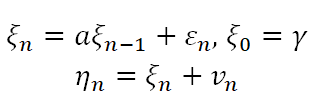

In [ ]:
ksi_n = np.zeros(n)
ksi_n[0] = ksi_0

eta_n = np.zeros(n)
eta_n[0] = ksi_n[0] + v_n[0]

for i in range(1, n):
  ksi_n[i] = a * ksi_n[i-1] + eps_n[i]
  eta_n[i] = ksi_n[i] + v_n[i]

In [ ]:
ksi_n_visual = pd.DataFrame(ksi_n)
ksi_n_visual

,0
0,1.617361
1,1.452643
2,-0.046937
3,0.649472
4,-0.512406
...,...
95,-0.186243
96,0.488415
97,-0.403773
98,-0.826186


In [ ]:
eta_n_visual = pd.DataFrame(eta_n)
eta_n_visual

,0
0,1.889017
1,1.801119
2,-2.877143
3,-0.134285
4,-2.810475
...,...
95,0.686330
96,1.497171
97,-0.760192
98,-0.925731


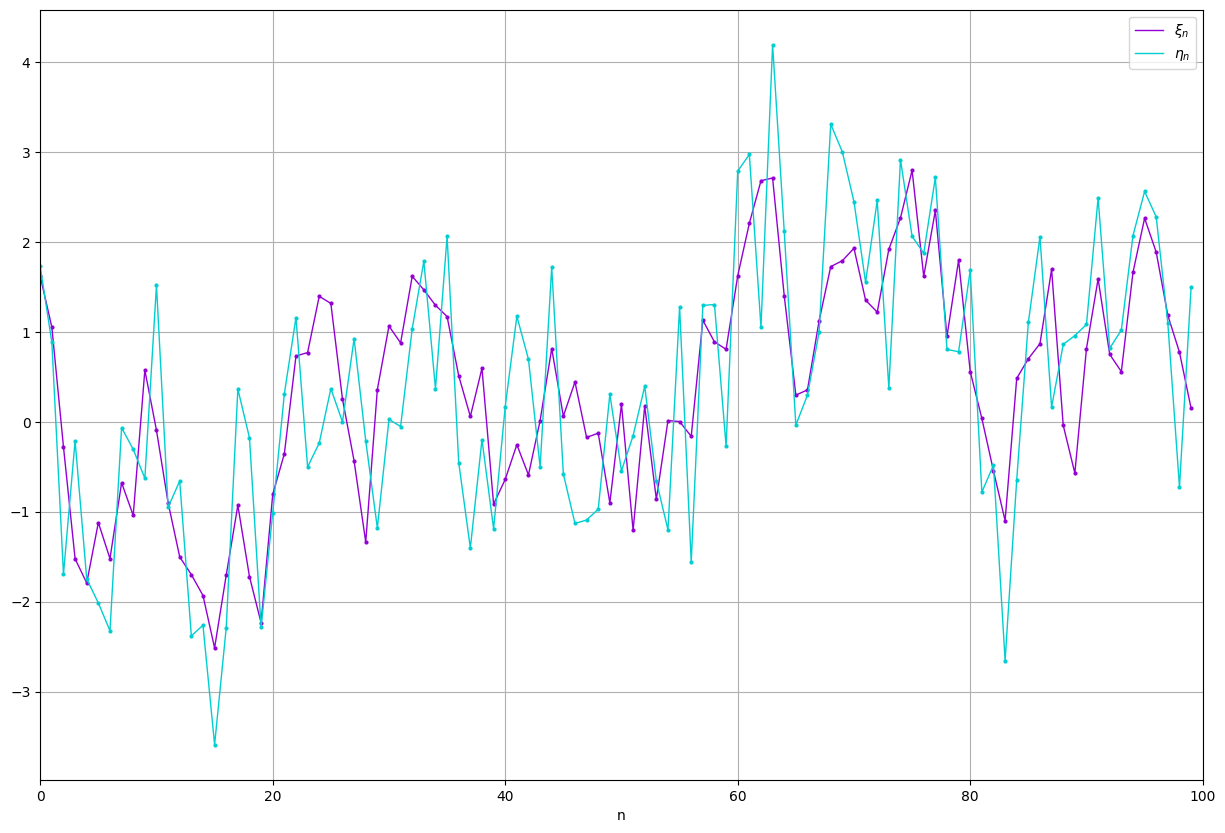

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlim([0, n])
plt.plot(np.arange(n), ksi_n, linestyle='-', linewidth=1, color='darkviolet', label="$\u03BE_n$")
plt.plot(np.arange(n), ksi_n, 'o', markersize = 2, color='darkviolet')
plt.plot(np.arange(n), eta_n, linestyle='-', linewidth=1, color='darkturquoise', label="$\u03B7_n$")
plt.plot(np.arange(n), eta_n, 'o', markersize = 2, color='darkturquoise')
plt.xlabel('n')
plt.legend()
plt.grid()
plt.show()

In [ ]:
p = D_eps / D_v
K_0 = sigma**2 / D_v
ksi_0_filter = mu

K = np.zeros(n)

K[0] = K_0
for i in range(1, n):
    K[i] = ((a ** 2) * K[i-1] + p) / ((a ** 2) * K[i-1] + p + 1)

ksi_n_filter = np.zeros(n)
ksi_n_filter[0] = ksi_0_filter
for i in range(1, n):
    ksi_n_filter[i] = a * ksi_n_filter[i-1] + K[i] * (eta_n[i] - a * ksi_n_filter[i-1])


In [ ]:
ksi_n_filter_visual = pd.DataFrame(ksi_n_filter)
ksi_n_filter_visual

,0
0,1.500000
1,1.605741
2,-0.905360
3,-0.395077
4,-1.477406
...,...
95,0.284014
96,0.813312
97,-0.059926
98,-0.460234


In [ ]:
K_visual = pd.DataFrame(K)
K_visual

,0
0,4.444444
1,0.739884
2,0.507197
3,0.477860
4,0.473911
...,...
95,0.473290
96,0.473290
97,0.473290
98,0.473290


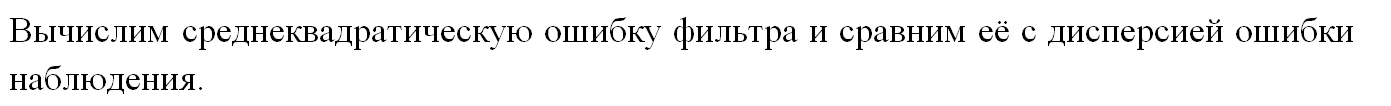

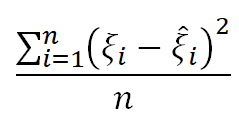

In [ ]:
sum = 0
for i in range(n):
  sum += ((ksi_n[i] - ksi_n_filter[i]) ** 2) / n
(sum, D_v)

(0.3357167954784313, 0.9)

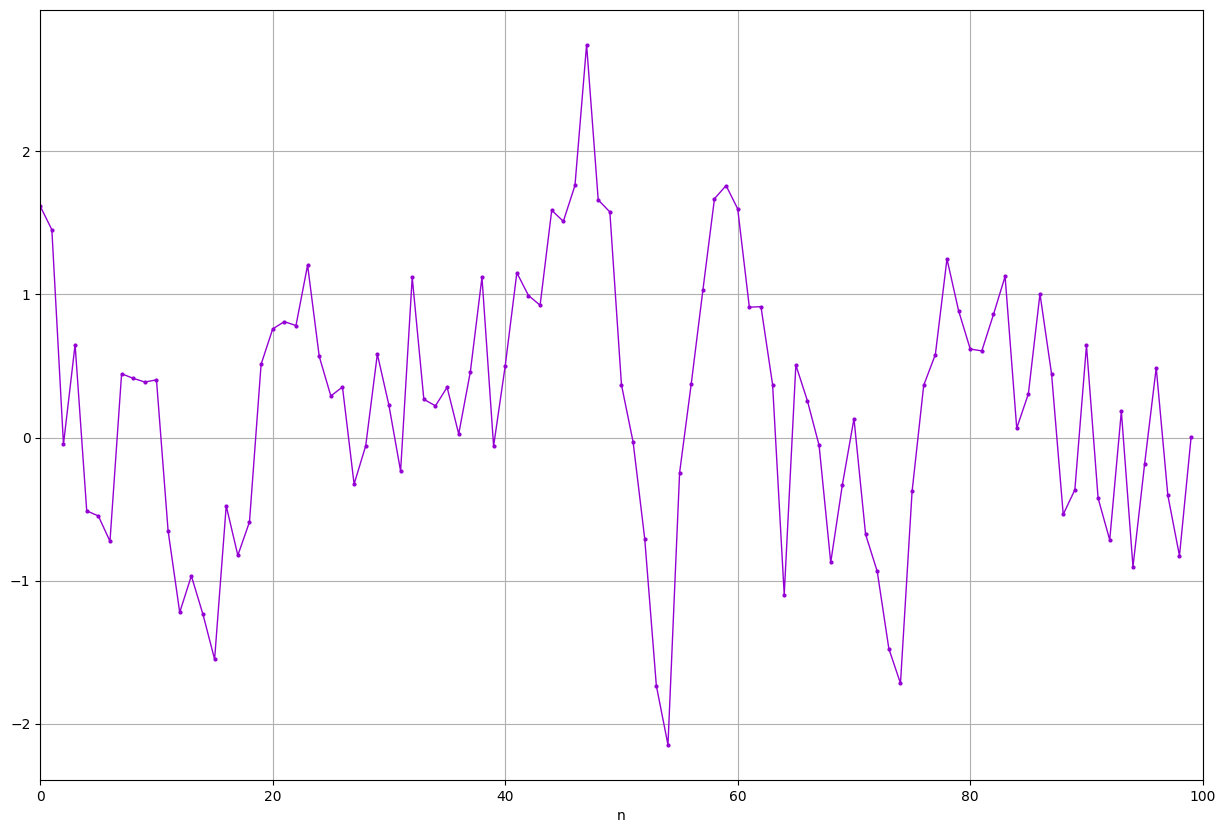

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlim([0, n])
plt.plot(np.arange(n), ksi_n, linestyle='-', linewidth=1, color='darkviolet')
plt.plot(np.arange(n), ksi_n, 'o', markersize = 2, color='darkviolet')
plt.xlabel('n')
plt.grid()
plt.show()

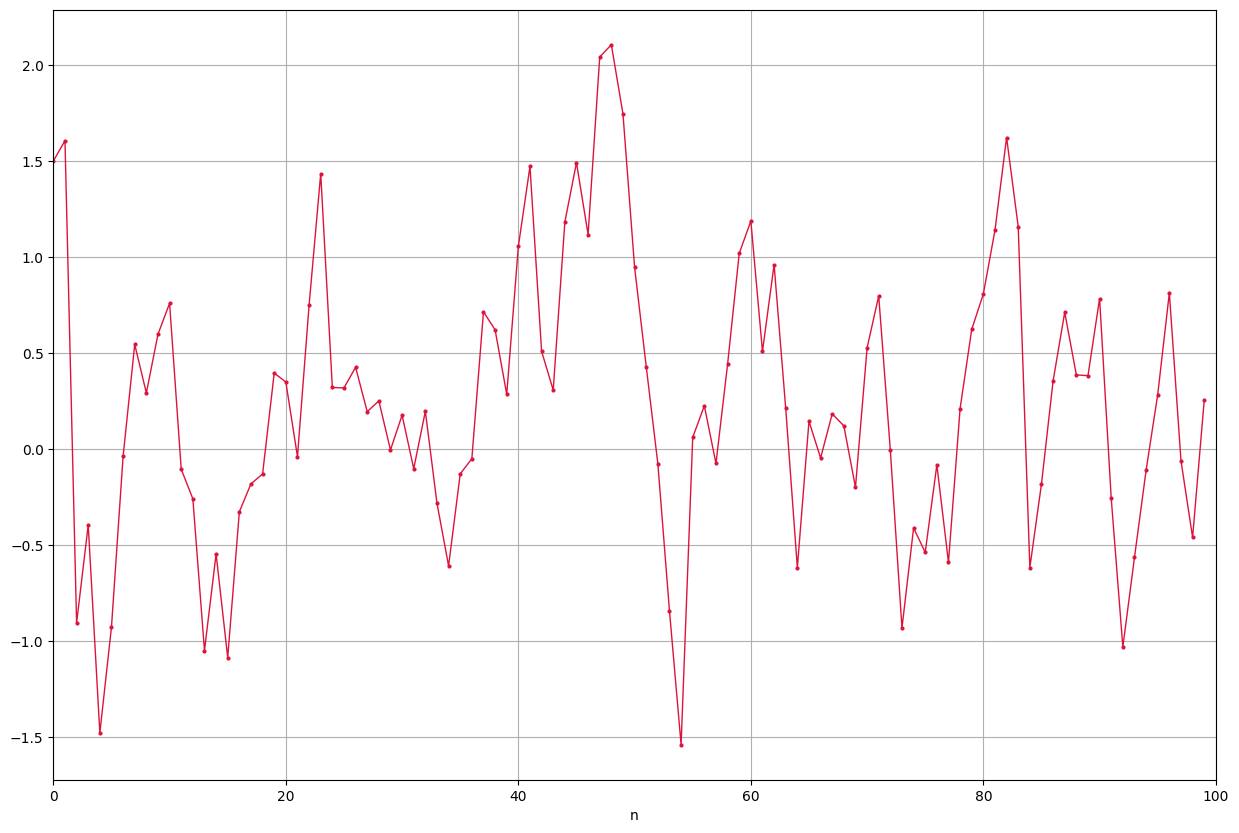

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlim([0, n])
plt.plot(np.arange(n), ksi_n_filter, linestyle='-', linewidth=1, color='crimson')
plt.plot(np.arange(n), ksi_n_filter, 'o', markersize = 2, color='crimson')
plt.xlabel('n')
plt.grid()
plt.show()

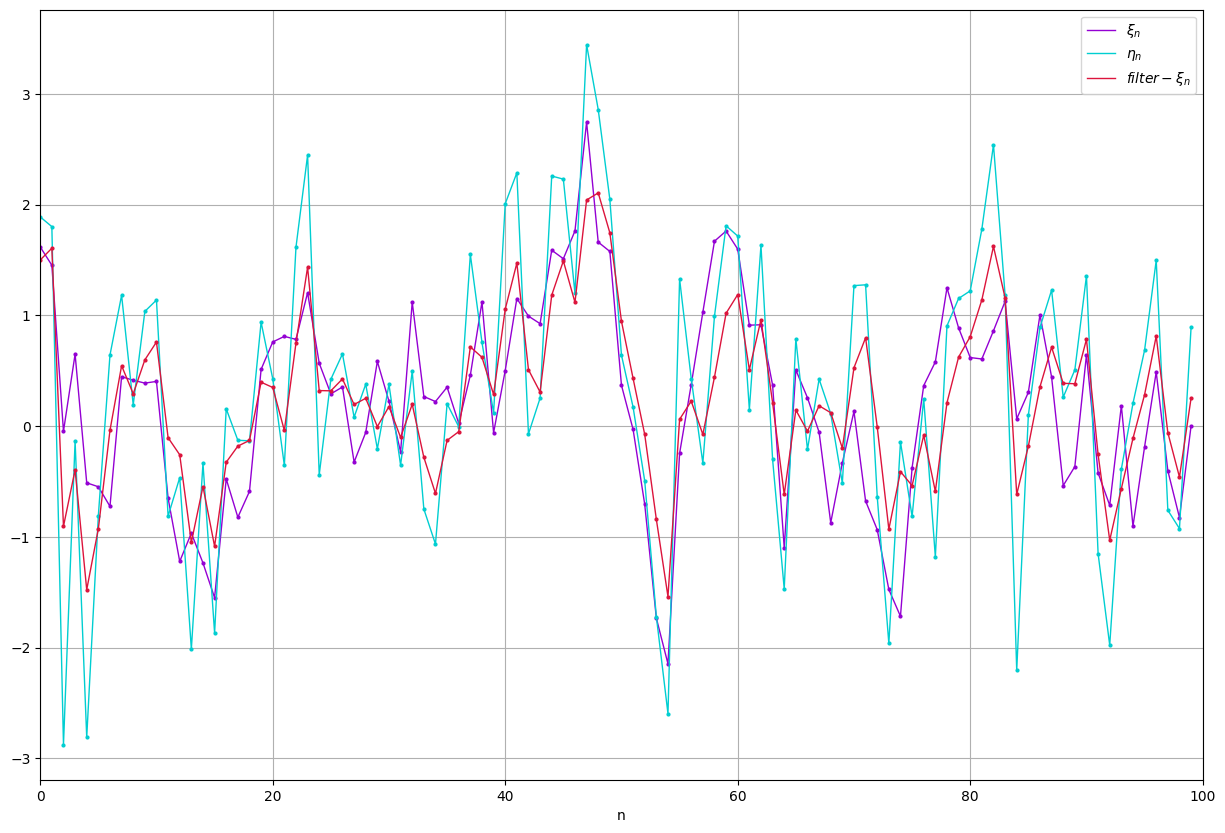

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlim([0, n])
plt.plot(np.arange(n), ksi_n, linestyle='-', linewidth=1, color='darkviolet', label="$\u03BE_n$")
plt.plot(np.arange(n), ksi_n, 'o', markersize = 2, color='darkviolet')
plt.plot(np.arange(n), eta_n, linestyle='-', linewidth=1, color='darkturquoise', label="$\u03B7_n$")
plt.plot(np.arange(n), eta_n, 'o', markersize = 2, color='darkturquoise')
plt.plot(np.arange(n), ksi_n_filter, linestyle='-', linewidth=1, color='crimson', label="$filter-\u03BE_n$")
plt.plot(np.arange(n), ksi_n_filter, 'o', markersize = 2, color='crimson')
plt.xlabel('n')
plt.legend()
plt.grid()
plt.show()

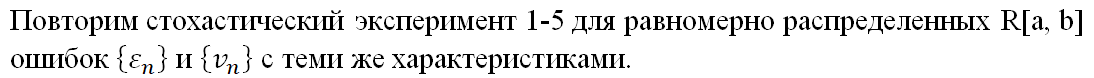

In [ ]:
eps_n = np.random.uniform(-np.sqrt(3*D_eps), np.sqrt(3*D_eps), n)
v_n = np.random.uniform(-np.sqrt(3*D_v), np.sqrt(3*D_v), n)
ksi_0

1.6173609684920511

In [ ]:
eps_n_visual = pd.DataFrame(eps_n)
eps_n_visual

,0
0,0.699013
1,-0.081393
2,-1.014673
3,-1.327765
4,-0.726629
...,...
95,1.099960
96,0.300931
97,-0.137039
98,-0.054736


In [ ]:
v_n_visual = pd.DataFrame(eps_n)
v_n_visual

,0
0,0.699013
1,-0.081393
2,-1.014673
3,-1.327765
4,-0.726629
...,...
95,1.099960
96,0.300931
97,-0.137039
98,-0.054736


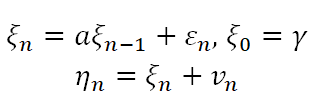

In [ ]:
ksi_n = np.zeros(n)
ksi_n[0] = ksi_0

eta_n = np.zeros(n)
eta_n[0] = ksi_n[0] + v_n[0]

for i in range(1, n):
  ksi_n[i] = a * ksi_n[i-1] + eps_n[i]
  eta_n[i] = ksi_n[i] + v_n[i]

In [ ]:
ksi_n_visual = pd.DataFrame(ksi_n)
ksi_n_visual

,0
0,1.617361
1,1.050759
2,-0.279142
3,-1.523164
4,-1.792844
...,...
95,2.261428
96,1.883930
97,1.181712
98,0.772463


In [ ]:
eta_n_visual = pd.DataFrame(eta_n)
eta_n_visual

,0
0,1.725782
1,0.881940
2,-1.694320
3,-0.210905
4,-1.747481
...,...
95,2.559179
96,2.276198
97,1.093138
98,-0.727054


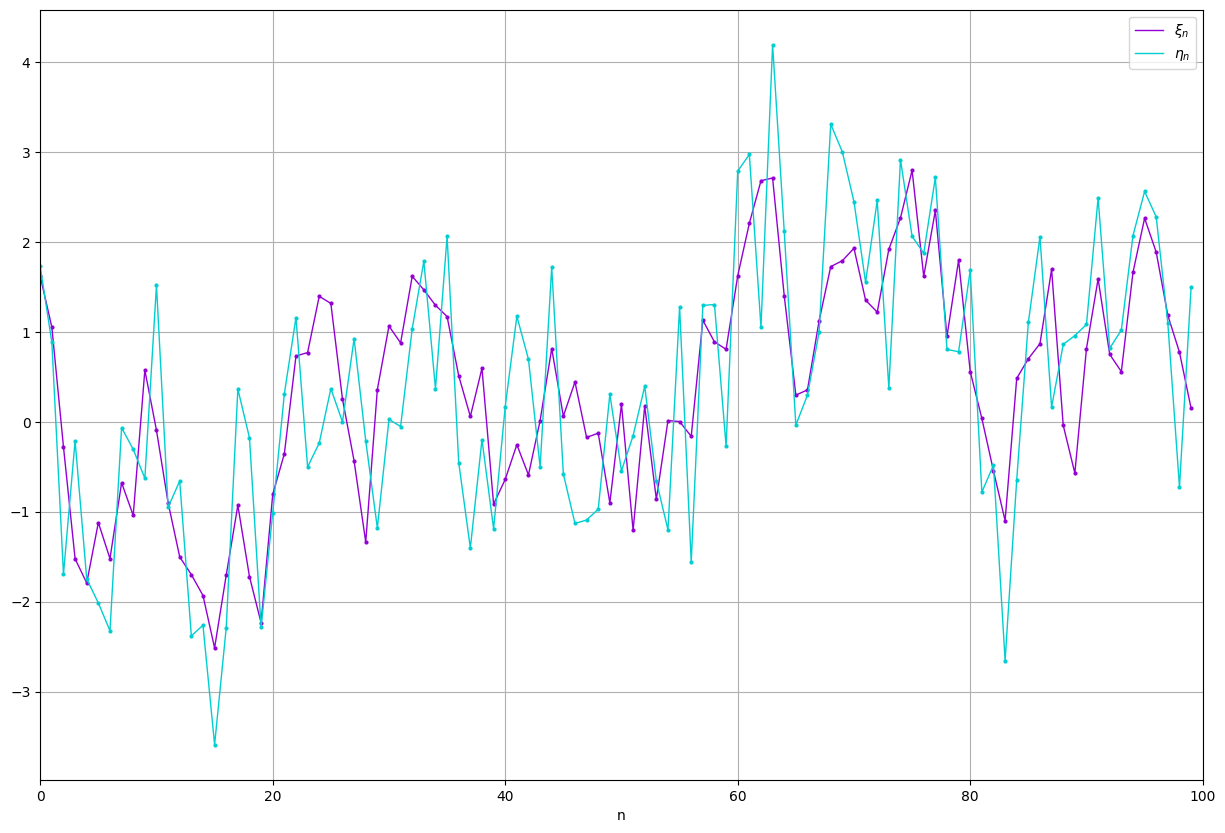

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlim([0, n])
plt.plot(np.arange(n), ksi_n, linestyle='-', linewidth=1, color='darkviolet', label="$\u03BE_n$")
plt.plot(np.arange(n), ksi_n, 'o', markersize = 2, color='darkviolet')
plt.plot(np.arange(n), eta_n, linestyle='-', linewidth=1, color='darkturquoise', label="$\u03B7_n$")
plt.plot(np.arange(n), eta_n, 'o', markersize = 2, color='darkturquoise')
plt.xlabel('n')
plt.legend()
plt.grid()
plt.show()

In [ ]:
p = D_eps / D_v
K_0 = sigma**2 / D_v
ksi_0_filter = mu

K = np.zeros(n)

#K[0] = ((a ** 2) * K_0 + p) / ((a ** 2) * K_0 + p + 1)
K[0] = K_0
for i in range(1, n):
    K[i] = ((a ** 2) * K[i-1] + p) / ((a ** 2) * K[i-1] + p + 1)

ksi_n_filter = np.zeros(n)
#ksi_filter[0] = a * xi_filter_0 + K[0] * (eta_n[0] - a * ksi_0_filter)
ksi_n_filter[0] = ksi_0_filter
for i in range(1, n):
    ksi_n_filter[i] = a * ksi_n_filter[i-1] + K[i] * (eta_n[i] - a * ksi_n_filter[i-1])


In [ ]:
ksi_n_filter_visual = pd.DataFrame(ksi_n_filter)
ksi_n_filter_visual

,0
0,1.500000
1,0.925655
2,-0.540039
3,-0.298166
4,-0.937954
...,...
95,1.684047
96,1.698205
97,1.143495
98,0.077495


In [ ]:
K_visual = pd.DataFrame(K)
K_visual

,0
0,4.444444
1,0.739884
2,0.507197
3,0.477860
4,0.473911
...,...
95,0.473290
96,0.473290
97,0.473290
98,0.473290


In [ ]:
sum = 0
for i in range(n):
  sum += ((ksi_n[i] - ksi_n_filter[i]) ** 2) / n
(sum, D_v)

(0.4640649415056453, 0.9)

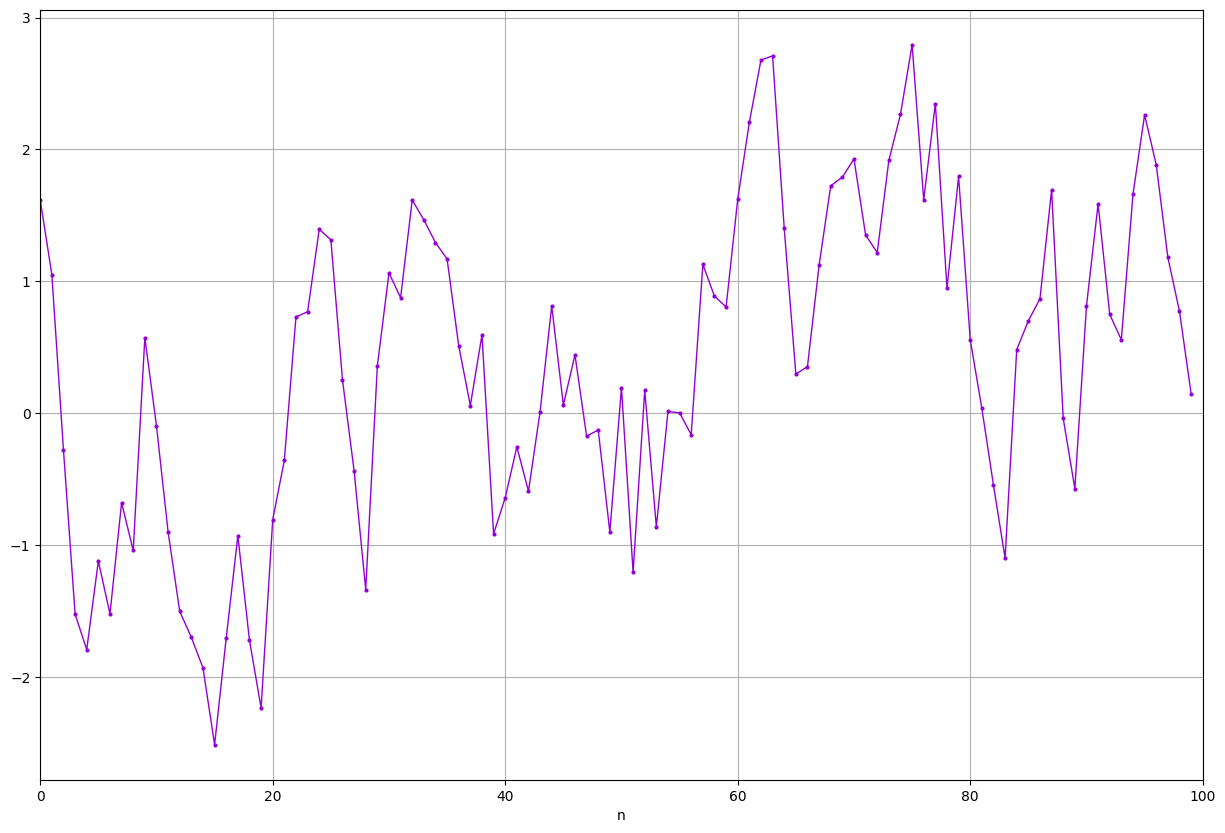

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlim([0, n])
plt.plot(np.arange(n), ksi_n, linestyle='-', linewidth=1, color='darkviolet')
plt.plot(np.arange(n), ksi_n, 'o', markersize = 2, color='darkviolet')
plt.xlabel('n')
plt.grid()
plt.show()

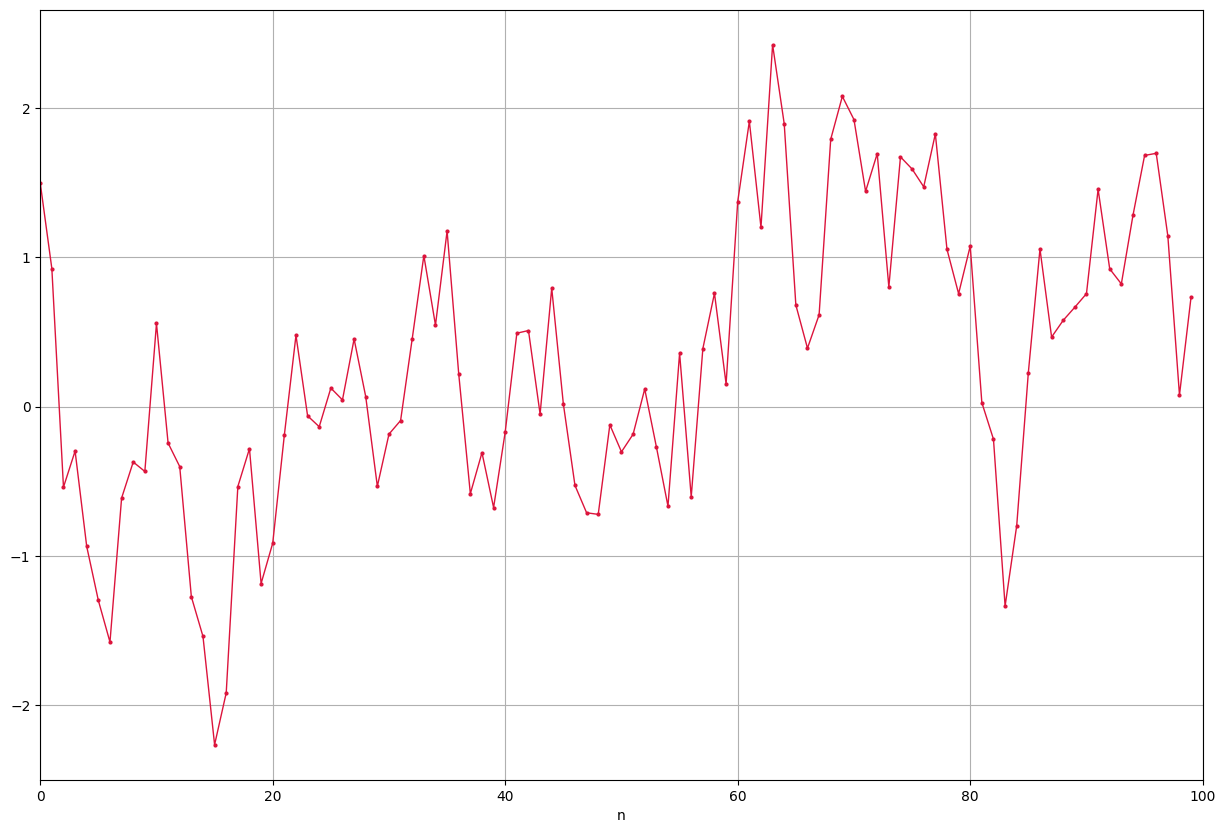

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlim([0, n])
plt.plot(np.arange(n), ksi_n_filter, linestyle='-', linewidth=1, color='crimson')
plt.plot(np.arange(n), ksi_n_filter, 'o', markersize = 2, color='crimson')
plt.xlabel('n')
plt.grid()
plt.show()

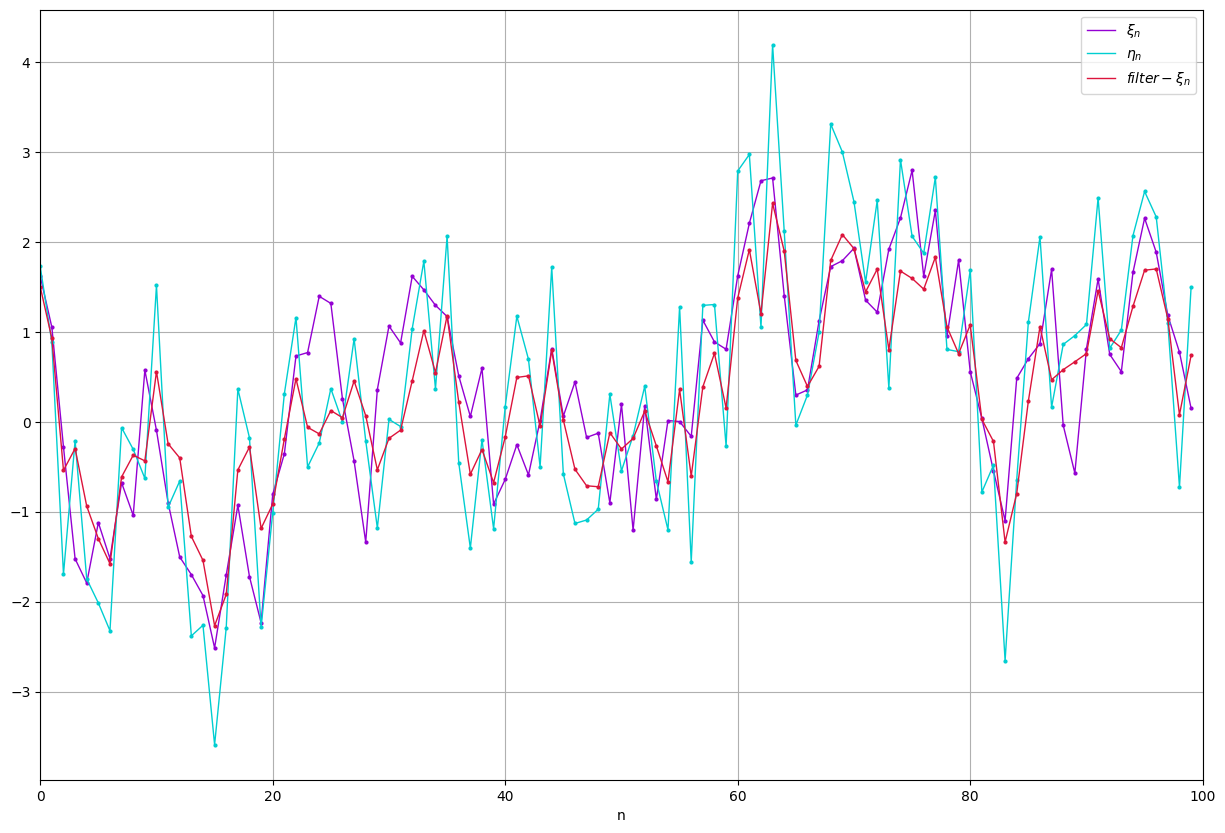

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlim([0, n])
plt.plot(np.arange(n), ksi_n, linestyle='-', linewidth=1, color='darkviolet', label="$\u03BE_n$")
plt.plot(np.arange(n), ksi_n, 'o', markersize = 2, color='darkviolet')
plt.plot(np.arange(n), eta_n, linestyle='-', linewidth=1, color='darkturquoise', label="$\u03B7_n$")
plt.plot(np.arange(n), eta_n, 'o', markersize = 2, color='darkturquoise')
plt.plot(np.arange(n), ksi_n_filter, linestyle='-', linewidth=1, color='crimson', label="$filter-\u03BE_n$")
plt.plot(np.arange(n), ksi_n_filter, 'o', markersize = 2, color='crimson')
plt.xlabel('n')
plt.legend()
plt.grid()
plt.show()